In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.metrics import explained_variance_score, make_scorer, accuracy_score, fbeta_score, f1_score
from sklearn.model_selection import validation_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from imblearn.over_sampling import SMOTE

In [2]:
# Importing the dataset
dataset = pd.read_csv('waveform.data', header = None)
X = dataset.iloc[:, :21].values
y = dataset.iloc[:, 21].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

The best k is :  {'n_neighbors': 76}
 the best k score is  0.85725


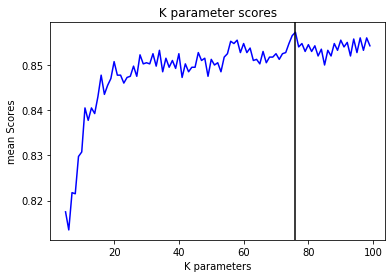

In [3]:
# finding the best K in the training data 

knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(5,100)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5, scoring= "accuracy",  n_jobs = -1)
#fit model to data
knn_gscv.fit(X_train, y_train)
bestk = knn_gscv.best_params_
print("The best k is : ",bestk)

#check mean score for the top performing value of n_neighbors
bestk_score=knn_gscv.best_score_
print(" the best k score is ",bestk_score)
results =knn_gscv.cv_results_

plt.plot(param_grid["n_neighbors"] , results["mean_test_score"], color = "blue", label = " accuracies over training data")
plt.axvline(x=bestk["n_neighbors"], label='best k ' ,color = "black")
plt.title(" K parameter scores ")
plt.xlabel("K parameters")
plt.ylabel("mean Scores")
plt.show()

In [4]:
# fitting the test set with the best K 

knn = KNeighborsClassifier(n_neighbors=76)


knn.fit(X_test, y_test)
#Accuracy of the best model
y_pred = knn.predict(X_test)

Optimalkscore = knn.score(X_test, y_test)
print(Optimalkscore)

0.853


[learning_curve] Training set sizes: [ 100  350  600  850 1100 1350 1600 1850 2100 2350 2600 2850 3100 3350
 3600 3850]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   10.0s finished


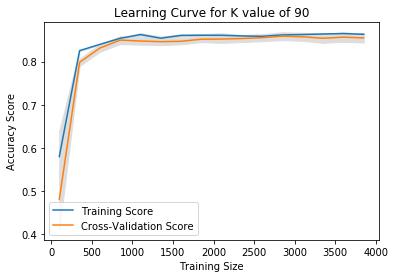

[learning_curve] Training set sizes: [ 100  350  600  850 1100 1350 1600 1850 2100 2350 2600 2850 3100 3350
 3600 3850]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    9.2s finished


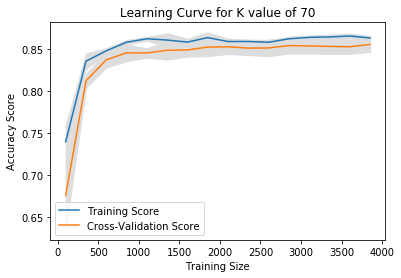

[learning_curve] Training set sizes: [ 100  350  600  850 1100 1350 1600 1850 2100 2350 2600 2850 3100 3350
 3600 3850]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    8.3s finished


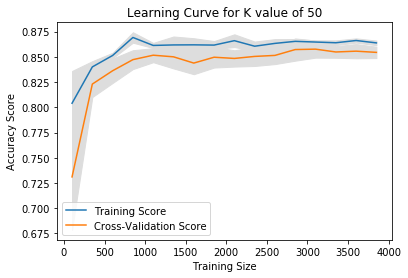

[learning_curve] Training set sizes: [ 100  350  600  850 1100 1350 1600 1850 2100 2350 2600 2850 3100 3350
 3600 3850]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    7.9s finished


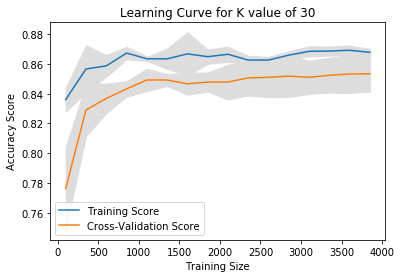

[learning_curve] Training set sizes: [ 100  350  600  850 1100 1350 1600 1850 2100 2350 2600 2850 3100 3350
 3600 3850]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    7.6s finished


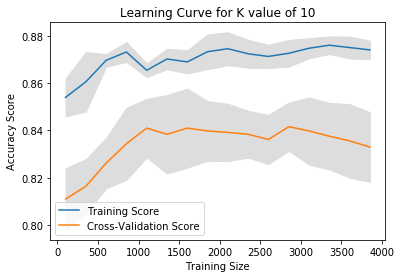

In [5]:
# plotting different values of K from big to small on increasing sample sizes 

for cc in range(90,5,-20):
    knn1 = KNeighborsClassifier(n_neighbors=cc, metric = 'minkowski', p = 2)

    train_size, train_score, test_score =learning_curve(knn1, X,y, cv = 5, scoring= "accuracy", n_jobs = -1 , train_sizes= range(100,4000,250), verbose = 1)


    train_mean = np.mean(train_score, axis = 1)
    train_std = np.std(train_score, axis = 1)
    test_mean = np.mean(test_score, axis =1 )
    test_std = np.std(test_score, axis =1 )


    plt.plot(train_size, train_mean, label = 'Training Score')
    plt.plot(train_size, test_mean, label = 'Cross-Validation Score')

    plt.fill_between(train_size, train_mean-train_std, train_mean+train_std, color = '#DDDDDD')
    plt.fill_between(train_size, test_mean-test_std, test_mean+test_std, color =   '#DDDDDD')




    plt.title('Learning Curve for K value of {}'.format(cc))
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc = 'best')
    plt.show()

In [6]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# from IPython.display import clear_output

In [7]:
data = pd.read_csv('waveform.data',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


In [8]:
def remove_outliers(data):
    """
    removing outliers and the examples of the bayesian error region
    """
    features = data[range(21)].values
    labels = data[21].values
    # splitting the data into set1 and set2
    set1_x,set2_x,set1_y,set2_y = train_test_split(features,labels,test_size=0.5,random_state=101)
    count = set1_x.shape[0]+set2_x.shape[0]
    
    while True:
        print("->",count,end=" ")
        knn = KNeighborsClassifier(n_neighbors=1)

        # use set1 to classify set2
        to_remove = list()
        knn.fit(set1_x,set1_y)
        pred = knn.predict(set2_x)
        for i in range(len(pred)):
            if not pred[i] == set2_y[i]:
                # examples to be removed
                to_remove.append(i)
        set2_x = np.delete(set2_x,to_remove,0)
        set2_y = np.delete(set2_y,to_remove,0)

        # use set2 to classify set1
        to_remove = list()
        knn.fit(set2_x,set2_y)
        pred = knn.predict(set1_x)
        for i in range(len(pred)):
            if not pred[i] == set1_y[i]:
                # examples to be removed
                to_remove.append(i)
        set1_x = np.delete(set1_x,to_remove,0)
        set1_y = np.delete(set1_y,to_remove,0)

        # if convergence reached
        if count == set1_x.shape[0]+set2_x.shape[0]:
            break
        count = set1_x.shape[0]+set2_x.shape[0]
    print()

    clean_data = pd.DataFrame(np.append(set1_x,set2_x,axis=0))
    clean_data['label'] = np.append(set1_y,set2_y,axis=0)
    print('clean data size',clean_data.shape)
    
    return clean_data

In [9]:
def condensed_neighbor_rule(data):
    """
    removing the irrelevant examples using 1-NN Condensed Neighbor Rule
    """
    X = data[range(21)].values
    y = data['label'].values
    
    # new set with one example
    S = np.array([X[0]])
    Sy = np.array([y[0]])
    X = np.delete(X,0,0)
    y = np.delete(y,0,0)
    count = len(X)
    while True:
        print("->",count,end=" ")
        knn = KNeighborsClassifier(n_neighbors=1)
        i = 0
        while i < len(X):
            # using new set to classify the entire dataset
            knn.fit(S,Sy)
            pred = knn.predict([X[i]])
            if not pred[0] == y[i]:
                S = np.append(S,[X[i]],axis=0)
                Sy = np.append(Sy,[y[i]],axis=0)
                X = np.delete(X,i,0)
                y = np.delete(y,i,0)
            else:
                i += 1

        # if convergence reached
        if count == len(X):
            break
        count = len(X)
    print()    
    
    condensed_data = pd.DataFrame(S)
    condensed_data['label'] = Sy
    print('condensed data size',condensed_data.shape)
    
    return condensed_data

In [10]:
def reduced_neighbor_rule(c_data,data):
    """
    removing the condensed sample set even further using Reduced Neighbor Rule
    """
    knn = KNeighborsClassifier(n_neighbors=1)
    
    print("->",c_data.shape[0],end=" ")
    i = 0
    while i < len(c_data):
        
        # clear_output(wait=True)
        # removing one example from condensed dataset
        r_data = c_data.drop(i,axis=0)
        feat = r_data[range(21)].values
        label = r_data['label'].values
        knn.fit(feat,label)
        pred = knn.predict(data[range(21)].values)
        # delete example from condensed set if accuracy is same
        if accuracy_score(data[21].values,pred) == 1:
            c_data.drop(i,axis=None,inplace=True)
            print("->",c_data.shape[0],end=" ")
        else:
            i += 1
        # print(i,'/',len(data))
    
    print()
    print('reduced data size',c_data.shape)
    return c_data

In [11]:
print('removing outliers...')
print('reducing the size of data:')
clean_data = remove_outliers(data)
print()
print('using condensed neighbor rule...')
print('reducing the size of data:')
condensed_data = condensed_neighbor_rule(clean_data)
print()
print('using reduced neighbor rule...')
print('reducing the size of data:')
reduced_data = reduced_neighbor_rule(condensed_data,data)

removing outliers...
reducing the size of data:
-> 5000 -> 4092 -> 4058 
clean data size (4058, 22)

using condensed neighbor rule...
reducing the size of data:
-> 4057 -> 3377 -> 3183 -> 3165 -> 3163 -> 3162 
condensed data size (896, 22)

using reduced neighbor rule...
reducing the size of data:
-> 896 
reduced data size (896, 22)


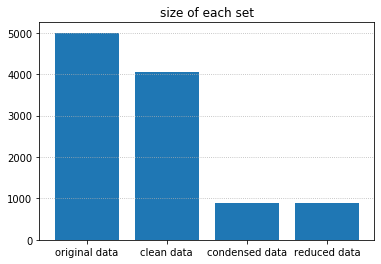

In [12]:
size = [5000,4058,896,896]
name = ['original data','clean data','condensed data','reduced data']
plt.bar(name,size)
plt.grid(ls=':',axis='y')
plt.title('size of each set')
plt.savefig('set-size.png')

In [13]:
data[21].value_counts()

2    1696
0    1657
1    1647
Name: 21, dtype: int64

In [14]:
to_remove = data[data[21]==2].sample(frac=1).index.values[:1650]
u_data = data.drop(index=to_remove)

In [15]:
u_data[21].value_counts()

0    1657
1    1647
2      46
Name: 21, dtype: int64

In [16]:
u_X = u_data[range(21)].values
u_y = u_data[21].values
sm = SMOTE(k_neighbors=1)
b_X, b_y = sm.fit_sample(u_X,u_y)
b_data = pd.DataFrame(b_X)
b_data['label'] = b_y
b_data['label'].value_counts()

2    1657
1    1657
0    1657
Name: label, dtype: int64

In [17]:
u_data.shape, b_data.shape, data.shape

((3350, 22), (4971, 22), (5000, 22))

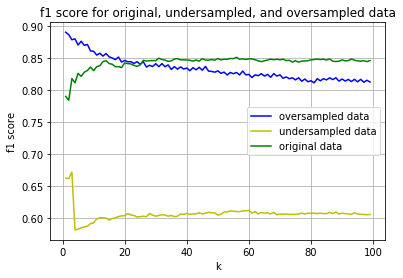

In [18]:
uX_tr, uX_te, uy_tr, uy_te = train_test_split(u_data[range(21)].values,u_data[21].values,
                                             test_size=0.33,random_state=42)
dX_tr, dX_te, dy_tr, dy_te = train_test_split(data[range(21)].values,data[21].values,
                                             test_size=0.33,random_state=42)
bX_tr, bX_te, by_tr, by_te = train_test_split(b_data[range(21)].values,b_data['label'].values,
                                             test_size=0.33,random_state=42)

u_f1 = list()
u_acc = list()
d_f1 = list()
d_acc = list()
b_f1 = list()
b_acc = list()

for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(dX_tr,dy_tr)
    pred = knn.predict(dX_te)
    d_acc.append(accuracy_score(dy_te,pred))
    d_f1.append(f1_score(dy_te,pred,average='macro'))
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(uX_tr,uy_tr)
    pred = knn.predict(uX_te)
    u_acc.append(accuracy_score(uy_te,pred))
    u_f1.append(f1_score(uy_te,pred,average='macro'))
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(bX_tr,by_tr)
    pred = knn.predict(bX_te)
    b_acc.append(accuracy_score(by_te,pred))
    b_f1.append(f1_score(by_te,pred,average='macro'))

# plt.figure(figsize=(15,10))
plt.plot(range(1,100),b_f1,color='b',label='oversampled data')
plt.plot(range(1,100),u_f1,color='y',label='undersampled data')
plt.plot(range(1,100),d_f1,color='g',label='original data')
plt.title('f1 score for original, undersampled, and oversampled data')
plt.xlabel('k')
plt.ylabel('f1 score')
plt.grid()
plt.legend(loc=0)
plt.savefig('f1-score.png')

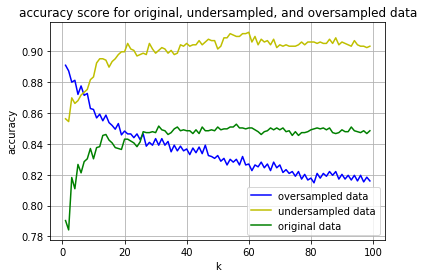

In [19]:
plt.plot(range(1,100),b_acc,color='b',label='oversampled data')
plt.plot(range(1,100),u_acc,color='y',label='undersampled data')
plt.plot(range(1,100),d_acc,color='g',label='original data')
plt.title('accuracy score for original, undersampled, and oversampled data')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid()
plt.legend(loc=0)
plt.savefig('acc-score.png')